In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from matplotlib import rcParams

In [6]:
rcParams["axes.facecolor"] = "white"
rcParams["figure.facecolor"] = "white"

In [7]:
train_df = pd.read_csv("../data/train.csv", header=0)
test_df = pd.read_csv("../data/test.csv", header=0)

In [8]:
nominal = [
    "Product_Info_1", "Product_Info_2", "Product_Info_3", "Product_Info_5", "Product_Info_6", "Product_Info_7",
    "Employment_Info_2", "Employment_Info_3", "Employment_Info_5",
    "InsuredInfo_1", "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",
    "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", "Insurance_History_7", "Insurance_History_8", "Insurance_History_9",
    "Family_Hist_1",
    "Medical_History_2", "Medical_History_3", "Medical_History_4", "Medical_History_5", "Medical_History_6", "Medical_History_7",
    "Medical_History_8", "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14",
    "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20", "Medical_History_21",
    "Medical_History_22", "Medical_History_23", "Medical_History_25", "Medical_History_26", "Medical_History_27", "Medical_History_28",
    "Medical_History_29", "Medical_History_30", "Medical_History_31", "Medical_History_33", "Medical_History_34", "Medical_History_35",
    "Medical_History_36", "Medical_History_37", "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41",
]
continuous = [
    "Product_Info_4", 
    "Ins_Age", "Ht", "Wt", "BMI",
    "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
    "Insurance_History_5",
    "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5",
]
discrete = ["Medical_History_1", "Medical_History_10", "Medical_History_15", "Medical_History_24", "Medical_History_32"]
dummy = ["Medical_Keyword_{}".format(x) for x in range(1, 49)]

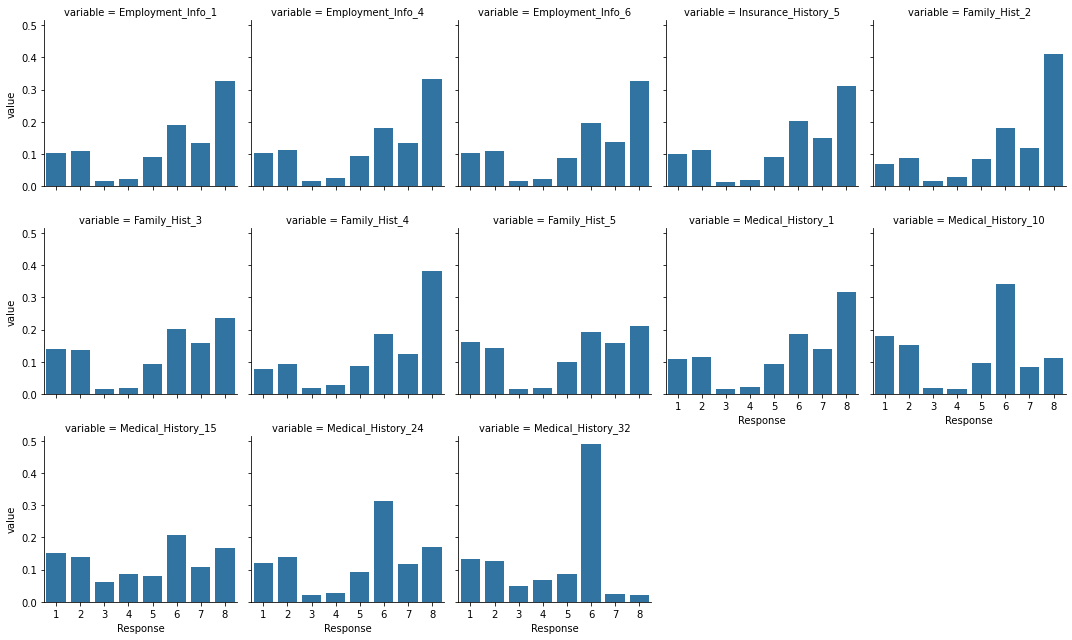

In [162]:
f = pd.concat((
    train_df["Response"],
    train_df[train_df.columns[np.where(train_df.isnull().sum(axis=0) > 0)]].notnull().astype(float)
), axis=1).groupby("Response").sum()
f = f / f.sum(axis=0)
f = pd.melt(f.reset_index(), id_vars=["Response"], value_vars=f.columns)
g = sns.FacetGrid(f, col="variable", col_wrap=5)
g.map(sns.barplot, "Response", "value", order=list(range(1, 9)))

Text(33.0, 0.5, 'Medical_Keyword_Count')

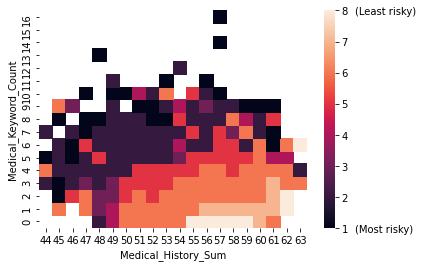

In [120]:
f = pd.concat((
    train_df["Response"], 
    train_df[[x for x in nominal if "Medical_History" in x and "_2" not in x]].sum(axis=1).rename("Medical_History_Sum"),
    train_df[dummy].sum(axis=1).rename("Medical_Keyword_Count")
), axis=1).groupby(["Medical_Keyword_Count", "Medical_History_Sum"]).median().reset_index()
f_heatmap = np.full((f["Medical_Keyword_Count"].max()+1, np.ptp(f["Medical_History_Sum"])+1), 8)
f_mask = np.ones_like(f_heatmap, dtype=int)
for tp in f.itertuples():
    f_heatmap[tp.Medical_Keyword_Count, tp.Medical_History_Sum - f["Medical_History_Sum"].min()] = tp.Response
    f_mask[tp.Medical_Keyword_Count, tp.Medical_History_Sum - f["Medical_History_Sum"].min()] = 0
g = sns.heatmap(f_heatmap, mask=f_mask, xticklabels=range(f["Medical_History_Sum"].min(), f["Medical_History_Sum"].max()+1))
g.invert_yaxis()
g.annotate("(Least risky)", (1.18, .982), xycoords="axes fraction")
g.annotate("(Most risky)", (1.18, -.02), xycoords="axes fraction")
plt.xlabel("Medical_History_Sum")
plt.ylabel("Medical_Keyword_Count")

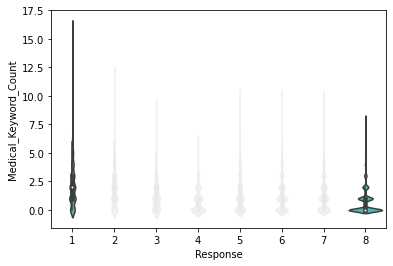

In [12]:
# plt.figure(figsize=(16, 9))
g = sns.violinplot(
    x="Response",
    y="Medical_Keyword_Count",
    data=pd.concat((train_df["Response"], train_df[dummy].sum(axis=1).rename("Medical_Keyword_Count")), axis=1)
)

for i in range(11):
    g.get_children()[2+i].set_color((.9,.9,.9,.5))
    g.get_children()[3+i].set_color((.9,.9,.9,.5))
    g.get_children()[18+i].set_color((.9,.9,.9,.5))
    g.get_children()[19+i].set_color((.9,.9,.9,.5))
g.get_children()[0].set_facecolor((.2,.7,.7,.9))
g.get_children()[14].set_facecolor((.2,.7,.7,.9))

        

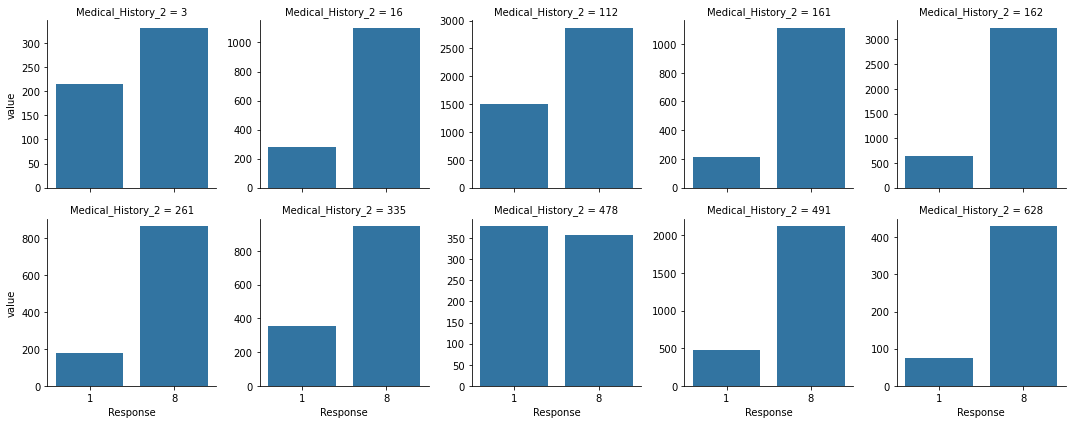

In [130]:
nominal_name_ = "Medical_History_2"
medical_history_2_top10 = train_df.loc[train_df["Response"].isin([1, 8]), ["Response"] + [nominal_name_]].groupby(nominal_name_).size().sort_values(ascending=False).head(10).index
f = pd.melt(
    train_df.loc[train_df["Response"].isin([1, 8]) & train_df[nominal_name_].isin(medical_history_2_top10), ["Response"] + [nominal_name_]].groupby([nominal_name_, "Response"]).size().rename("count").to_frame().reset_index(),
    id_vars=[nominal_name_, "Response"],
    value_vars=["count"]
)
g = sns.FacetGrid(f, col=nominal_name_, col_wrap=5, sharey=False)

# def barplot_(*args, **kwargs):
#     sns.barplot(args[0], args[1], palette="Set2" if args[-1].tolist()[0] == "A7" else [(.9,.9,.9,.5)], **kwargs)
    
g.map(sns.barplot, "Response", "value", order=[1, 8])

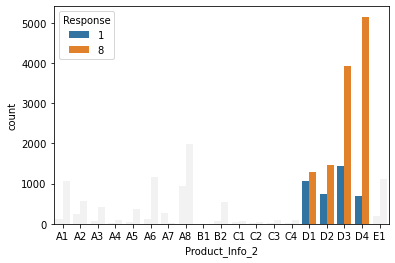

In [167]:
g = sns.barplot(
    x="Product_Info_2",
    y="count",
    hue="Response",
    data=train_df.loc[train_df["Response"].isin([1, 8]), ["Response"] + ["Product_Info_2"]].groupby(["Product_Info_2", "Response"]).size().rename("count").to_frame().reset_index()
)
for i in range(14):
    g.get_children()[i].set_facecolor((.9, .9, .9, .5))
    g.get_children()[19 + i].set_facecolor((.9, .9, .9, .5))
for i in range(18, 19):
    g.get_children()[i].set_facecolor((.9, .9, .9, .5))
    g.get_children()[19 + i].set_facecolor((.9, .9, .9, .5))
# for i in range(36, 38):
#     g.get_children()[i].set_facecolor((.9, .9, .9, .5))

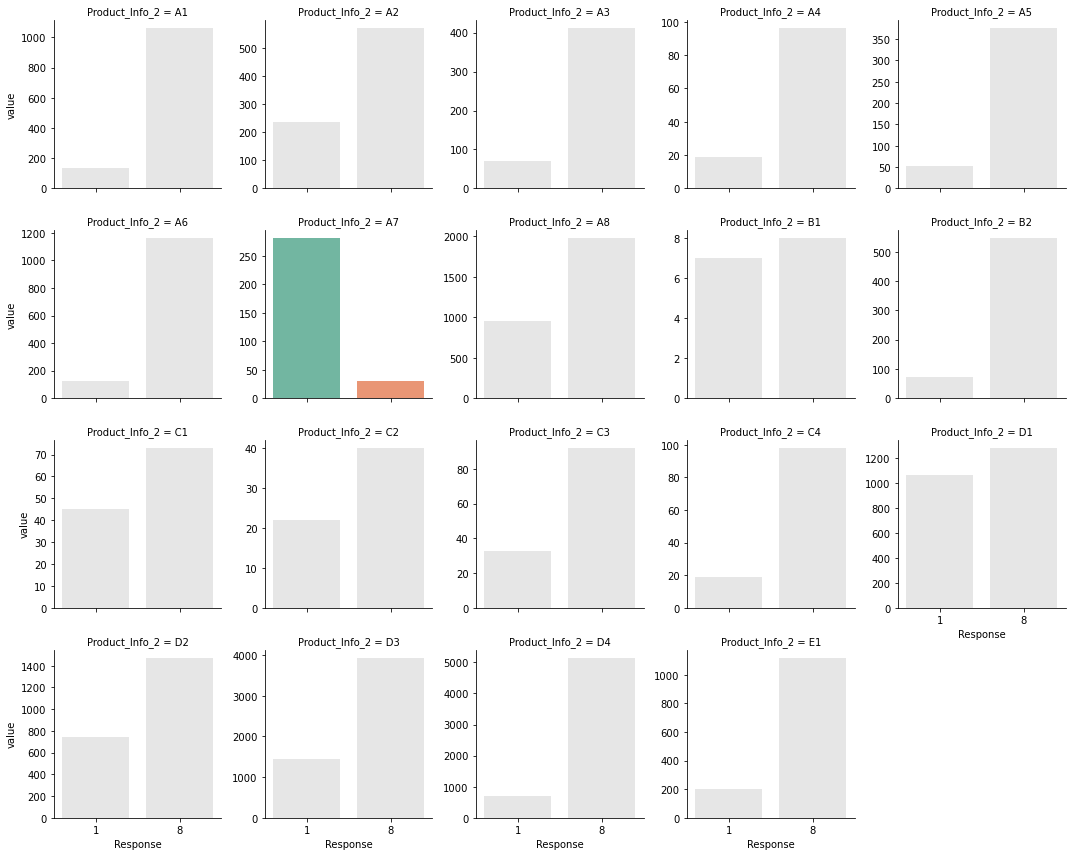

In [102]:
f = pd.melt(
    train_df.loc[train_df["Response"].isin([1, 8]), ["Response"] + ["Product_Info_2"]].groupby(["Product_Info_2", "Response"]).size().rename("count").to_frame().reset_index(),
    id_vars=["Product_Info_2", "Response"],
    value_vars=["count"]
)
g = sns.FacetGrid(f, col="Product_Info_2", col_wrap=5, sharey=False)

def barplot_(*args, **kwargs):
    sns.barplot(args[0], args[1], palette="Set2" if args[-1].tolist()[0] == "A7" else [(.9,.9,.9,.5)], **kwargs)
    
g.map(barplot_, "Response", "value", "Product_Info_2", order=[1, 8])

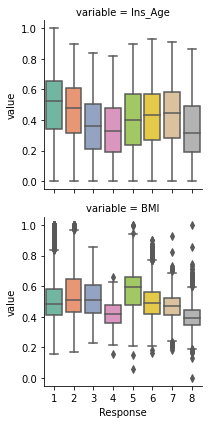

In [22]:
f = pd.melt(train_df.loc[:, ["Response"] + ["Ins_Age", "BMI"]], id_vars=["Response"], value_vars=["Ins_Age", "BMI"])
g = sns.FacetGrid(f, col="variable", col_wrap=1)
g.map(sns.boxplot, "Response", "value", order=list(range(1, 9)), palette="Set2")